In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

In [3]:
df.shape

(126314, 23)

In [9]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)

In [10]:
df.head()

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
0          1  194611010TRH   NBA        0     1947  11/1/1946           1   
1          1  194611010TRH   NBA        1     1947  11/1/1946           1   
2          2  194611020CHS   NBA        0     1947  11/2/1946           1   
3          2  194611020CHS   NBA        1     1947  11/2/1946           2   
4          3  194611020DTF   NBA        0     1947  11/2/1946           1   

   is_playoffs team_id  fran_id  pts    elo_i    elo_n  win_equiv opp_id  \
0            0     TRH  Huskies   66  1300.00  1293.28      40.29    NYK   
1            0     NYK   Knicks   68  1300.00  1306.72      41.71    TRH   
2            0     CHS    Stags   63  1300.00  1309.65      42.01    NYK   
3            0     NYK   Knicks   47  1306.72  1297.07      40.69    CHS   
4            0     DTF  Falcons   33  1300.00  1279.62      38.86    WSC   

   opp_fran  opp_pts  opp_elo_i  opp_elo_n game_location game_result  \
0    Knicks       68    1300.00    1306.72             H           L   
1   Huskies       66    1300.00    1293.28             A           W   
2    Knicks       47    1306.72    1297.07             H           W   
3     Stags       63    1300.00    1309.65             A           L   
4  Capitols       50    1300.00    1320.38             H           L   

   forecast notes  
0      0.64   NaN  
1      0.36   NaN  
2      0.63   NaN  
3      0.37   NaN  
4      0.64   NaN

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [12]:
df.describe()

gameorder   _iscopy    year_id  seasongame  is_playoffs        pts  \
count  126314.00  126314.0  126314.00   126314.00    126314.00  126314.00   
mean    31579.00       0.5    1988.20       43.53         0.06     102.73   
std     18231.93       0.5      17.58       25.38         0.24      14.81   
min         1.00       0.0    1947.00        1.00         0.00       0.00   
25%     15790.00       0.0    1975.00       22.00         0.00      93.00   
50%     31579.00       0.5    1990.00       43.00         0.00     103.00   
75%     47368.00       1.0    2003.00       65.00         0.00     112.00   
max     63157.00       1.0    2015.00      108.00         1.00     186.00   

           elo_i      elo_n  win_equiv    opp_pts  opp_elo_i  opp_elo_n  \
count  126314.00  126314.00  126314.00  126314.00  126314.00  126314.00   
mean     1495.24    1495.24      41.71     102.73    1495.24    1495.24   
std       112.14     112.46      10.63      14.81     112.14     112.46   
min      1091.64    1085.77      10.15       0.00    1091.64    1085.77   
25%      1417.24    1416.99      34.10      93.00    1417.24    1416.99   
50%      1500.95    1500.95      42.11     103.00    1500.95    1500.95   
75%      1576.06    1576.29      49.64     112.00    1576.06    1576.29   
max      1853.10    1853.10      71.11     186.00    1853.10    1853.10   

        forecast  
count  126314.00  
mean        0.50  
std         0.22  
min         0.02  
25%         0.33  
50%         0.50  
75%         0.67  
max         0.98

In [13]:
df["team_id"].value_counts()

BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
PIT      60
DTF      60
TRH      60
INJ      60
SDS      11
Name: team_id, Length: 104, dtype: int64

In [14]:
df["fran_id"].value_counts()

Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Denver       

In [15]:
df.loc[df["fran_id"] == "Lakers", "team_id"].value_counts()

LAL    5078
MNL     946
Name: team_id, dtype: int64

In [17]:
df.loc[df["team_id"] == "BOS", "pts"].sum()

626484

In [18]:
revenues = pd.Series([5555, 7000, 1980])

In [19]:
revenues

0    5555
1    7000
2    1980
dtype: int64

In [20]:
revenues.index

RangeIndex(start=0, stop=3, step=1)

In [21]:
city_revenues = pd.Series(
    [4200, 8000, 6500],
    index=["Amsterdam", "Toronto", "Tokyo"]
)
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [22]:
city_employee_count = pd.Series({"Amsterdam": 5, "Tokyo": 8})
city_employee_count

Amsterdam    5
Tokyo        8
dtype: int64

In [23]:
city_employee_count.keys()

Index(['Amsterdam', 'Tokyo'], dtype='object')

In [27]:
"Tokyo" in city_employee_count

True

In [28]:
city_data = pd.DataFrame({
    "revenue": city_revenues,
    "employee_count": city_employee_count
})

In [29]:
city_data

revenue  employee_count
Amsterdam     4200             5.0
Tokyo         6500             8.0
Toronto       8000             NaN

In [30]:
city_data.index

Index(['Amsterdam', 'Tokyo', 'Toronto'], dtype='object')

In [31]:
city_data.values

array([[4.2e+03, 5.0e+00],
       [6.5e+03, 8.0e+00],
       [8.0e+03,     nan]])

In [33]:
df.index

RangeIndex(start=0, stop=126314, step=1)

In [34]:
df.axes

[RangeIndex(start=0, stop=126314, step=1),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

In [36]:
city_revenues

Amsterdam    4200
Toronto      8000
Tokyo        6500
dtype: int64

In [37]:
city_revenues[1:]

Toronto    8000
Tokyo      6500
dtype: int64

In [38]:
current_decade = df[df["year_id"] > 2010]

In [39]:
current_decade

gameorder       game_id lg_id  _iscopy  year_id   date_game  \
113656      56829  201010260BOS   NBA        1     2011  10/26/2010   
113657      56829  201010260BOS   NBA        0     2011  10/26/2010   
113658      56830  201010260LAL   NBA        1     2011  10/26/2010   
113659      56830  201010260LAL   NBA        0     2011  10/26/2010   
113660      56831  201010260POR   NBA        1     2011  10/26/2010   
...           ...           ...   ...      ...      ...         ...   
126309      63155  201506110CLE   NBA        0     2015   6/11/2015   
126310      63156  201506140GSW   NBA        0     2015   6/14/2015   
126311      63156  201506140GSW   NBA        1     2015   6/14/2015   
126312      63157  201506170CLE   NBA        0     2015   6/16/2015   
126313      63157  201506170CLE   NBA        1     2015   6/16/2015   

        seasongame  is_playoffs team_id    fran_id  pts    elo_i    elo_n  \
113656           1            0     MIA       Heat   80  1547.36  1543.16   
113657           1            0     BOS    Celtics   88  1625.10  1629.30   
113658           1            0     HOU    Rockets  110  1504.20  1502.60   
113659           1            0     LAL     Lakers  112  1647.60  1649.20   
113660           1            0     PHO       Suns   92  1643.02  1630.62   
...            ...          ...     ...        ...  ...      ...      ...   
126309         100            1     CLE  Cavaliers   82  1723.41  1704.39   
126310         102            1     GSW   Warriors  104  1809.98  1813.63   
126311         101            1     CLE  Cavaliers   91  1704.39  1700.74   
126312         102            1     CLE  Cavaliers   97  1700.74  1692.09   
126313         103            1     GSW   Warriors  105  1813.63  1822.29   

        win_equiv opp_id      opp_fran  opp_pts  opp_elo_i  opp_elo_n  \
113656      45.14    BOS       Celtics       88    1625.10    1629.30   
113657      53.75    MIA          Heat       80    1547.36    1543.16   
113658      40.90    LAL        Lakers      112    1647.60    1649.20   
113659      55.61    HOU       Rockets      110    1504.20    1502.60   
113660      53.88    POR  Trailblazers      106    1552.81    1565.22   
...           ...    ...           ...      ...        ...        ...   
126309      60.31    GSW      Warriors      103    1790.96    1809.98   
126310      68.01    CLE     Cavaliers       91    1704.39    1700.74   
126311      60.01    GSW      Warriors      104    1809.98    1813.63   
126312      59.29    GSW      Warriors      105    1813.63    1822.29   
126313      68.52    CLE     Cavaliers       97    1700.74    1692.09   

       game_location game_result  forecast notes  
113656             A           L      0.26   NaN  
113657             H           W      0.74   NaN  
113658             A           L      0.20   NaN  
113659             H           W      0.80   NaN  
113660             A           L      0.49   NaN  
...              ...         ...       ...   ...  
126309             H           L      0.55   NaN  
126310             H           W      0.77   NaN  
126311             A           L      0.23   NaN  
126312             H           L      0.48   NaN  
126313             A           W      0.52   NaN  

[12658 rows x 23 columns]

In [40]:
current_decade.shape

(12658, 23)

In [41]:
df[
    (df["_iscopy"] == 0) &
    (df["pts"] > 100) &
    (df["opp_pts"] > 100) &
    (df["team_id"] == "BLB")
]

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
1726        864  194902260BLB   NBA        0     1949  2/26/1949          53   
4890       2446  195301100BLB   NBA        0     1953  1/10/1953          32   
4909       2455  195301140BLB   NBA        0     1953  1/14/1953          34   
5208       2605  195303110BLB   NBA        0     1953  3/11/1953          66   
5825       2913  195402220BLB   NBA        0     1954  2/22/1954          60   

      is_playoffs team_id    fran_id  pts    elo_i    elo_n  win_equiv opp_id  \
1726            0     BLB  Baltimore  114  1421.94  1419.43      38.56    MNL   
4890            0     BLB  Baltimore  126  1328.67  1356.65      25.80    BOS   
4909            0     BLB  Baltimore  104  1349.83  1346.36      24.88    MNL   
5208            0     BLB  Baltimore  107  1284.52  1282.24      19.58    NYK   
5825            0     BLB  Baltimore  110  1303.75  1301.97      20.74    BOS   

     opp_fran  opp_pts  opp_elo_i  opp_elo_n game_location game_result  \
1726   Lakers      115    1637.99    1640.49             H           L   
4890  Celtics      105    1591.14    1563.17             H           W   
4909   Lakers      112    1665.44    1668.91             H           L   
5208   Knicks      113    1649.15    1651.44             H           L   
5825  Celtics      111    1591.49    1593.27             H           L   

      forecast            notes  
1726      0.34              NaN  
4890      0.28              NaN  
4909      0.22              NaN  
5208      0.18     at Boston MA  
5825      0.25  at Worcester MA

In [43]:
df[
    (df["fran_id"] == "Spurs") &
    (df["year_id"] > 2010)
].groupby(["year_id", "game_result"])["game_id"].count()

year_id  game_result
2011     L              25
         W              63
2012     L              20
         W              60
2013     L              30
         W              73
2014     L              27
         W              78
2015     L              31
         W              58
Name: game_id, dtype: int64

In [44]:
df[
    (df["fran_id"] == "Warriors") &
    (df["year_id"] == 2015)
].groupby(["is_playoffs", "game_result"])["game_id"].count()

is_playoffs  game_result
0            L              15
             W              67
1            L               5
             W              16
Name: game_id, dtype: int64

In [45]:
nba = df.copy()

In [46]:
nba.shape

(126314, 23)

In [47]:
nba["difference"] = df.pts - df.opp_pts
nba

gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947  11/1/1946   
1               1  194611010TRH   NBA        1     1947  11/1/1946   
2               2  194611020CHS   NBA        0     1947  11/2/1946   
3               2  194611020CHS   NBA        1     1947  11/2/1946   
4               3  194611020DTF   NBA        0     1947  11/2/1946   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015  6/11/2015   
126310      63156  201506140GSW   NBA        0     2015  6/14/2015   
126311      63156  201506140GSW   NBA        1     2015  6/14/2015   
126312      63157  201506170CLE   NBA        0     2015  6/16/2015   
126313      63157  201506170CLE   NBA        1     2015  6/16/2015   

        seasongame  is_playoffs team_id    fran_id  pts    elo_i    elo_n  \
0                1            0     TRH    Huskies   66  1300.00  1293.28   
1                1            0     NYK     Knicks   68  1300.00  1306.72   
2                1            0     CHS      Stags   63  1300.00  1309.65   
3                2            0     NYK     Knicks   47  1306.72  1297.07   
4                1            0     DTF    Falcons   33  1300.00  1279.62   
...            ...          ...     ...        ...  ...      ...      ...   
126309         100            1     CLE  Cavaliers   82  1723.41  1704.39   
126310         102            1     GSW   Warriors  104  1809.98  1813.63   
126311         101            1     CLE  Cavaliers   91  1704.39  1700.74   
126312         102            1     CLE  Cavaliers   97  1700.74  1692.09   
126313         103            1     GSW   Warriors  105  1813.63  1822.29   

        win_equiv opp_id   opp_fran  opp_pts  opp_elo_i  opp_elo_n  \
0           40.29    NYK     Knicks       68    1300.00    1306.72   
1           41.71    TRH    Huskies       66    1300.00    1293.28   
2           42.01    NYK     Knicks       47    1306.72    1297.07   
3           40.69    CHS      Stags       63    1300.00    1309.65   
4           38.86    WSC   Capitols       50    1300.00    1320.38   
...           ...    ...        ...      ...        ...        ...   
126309      60.31    GSW   Warriors      103    1790.96    1809.98   
126310      68.01    CLE  Cavaliers       91    1704.39    1700.74   
126311      60.01    GSW   Warriors      104    1809.98    1813.63   
126312      59.29    GSW   Warriors      105    1813.63    1822.29   
126313      68.52    CLE  Cavaliers       97    1700.74    1692.09   

       game_location game_result  forecast notes  difference  
0                  H           L      0.64   NaN          -2  
1                  A           W      0.36   NaN           2  
2                  H           W      0.63   NaN          16  
3                  A           L      0.37   NaN         -16  
4                  H           L      0.64   NaN         -17  
...              ...         ...       ...   ...         ...  
126309             H           L      0.55   NaN         -21  
126310             H           W      0.77   NaN          13  
126311             A           L      0.23   NaN         -13  
126312             H           L      0.48   NaN          -8  
126313             A           W      0.52   NaN           8  

[126314 rows x 24 columns]

In [48]:
renamed_nba = nba.rename(
    columns={"game_result": "result", "game_location": "location"}
)

renamed_nba.head()

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
0          1  194611010TRH   NBA        0     1947  11/1/1946           1   
1          1  194611010TRH   NBA        1     1947  11/1/1946           1   
2          2  194611020CHS   NBA        0     1947  11/2/1946           1   
3          2  194611020CHS   NBA        1     1947  11/2/1946           2   
4          3  194611020DTF   NBA        0     1947  11/2/1946           1   

   is_playoffs team_id  fran_id  pts    elo_i    elo_n  win_equiv opp_id  \
0            0     TRH  Huskies   66  1300.00  1293.28      40.29    NYK   
1            0     NYK   Knicks   68  1300.00  1306.72      41.71    TRH   
2            0     CHS    Stags   63  1300.00  1309.65      42.01    NYK   
3            0     NYK   Knicks   47  1306.72  1297.07      40.69    CHS   
4            0     DTF  Falcons   33  1300.00  1279.62      38.86    WSC   

   opp_fran  opp_pts  opp_elo_i  opp_elo_n location result  forecast notes  \
0    Knicks       68    1300.00    1306.72        H      L      0.64   NaN   
1   Huskies       66    1300.00    1293.28        A      W      0.36   NaN   
2    Knicks       47    1306.72    1297.07        H      W      0.63   NaN   
3     Stags       63    1300.00    1309.65        A      L      0.37   NaN   
4  Capitols       50    1300.00    1320.38        H      L      0.64   NaN   

   difference  
0          -2  
1           2  
2          16  
3         -16  
4         -17

In [49]:
elo_columns = ["elo_i", "elo_n", "opp_elo_i", "opp_elo_n"]
nba.drop(elo_columns, inplace=True, axis=1)

In [50]:
nba["date_game"] = pd.to_datetime(nba["date_game"])

In [53]:
nba["game_location"].value_counts()

H    63138
A    63138
N       38
Name: game_location, dtype: int64

In [54]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [55]:
rows_without_missing_data = nba.dropna()

In [56]:
data_with_default_notes = nba.copy()

In [57]:
data_with_default_notes["notes"].fillna(
    value="no notes at all",
    inplace=True
)

In [58]:
data_with_default_notes["notes"].describe()

count              126314
unique                232
top       no notes at all
freq               120890
Name: notes, dtype: object

In [59]:
data_with_default_notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   gameorder      126314 non-null  int64         
 1   game_id        126314 non-null  object        
 2   lg_id          126314 non-null  object        
 3   _iscopy        126314 non-null  int64         
 4   year_id        126314 non-null  int64         
 5   date_game      126314 non-null  datetime64[ns]
 6   seasongame     126314 non-null  int64         
 7   is_playoffs    126314 non-null  int64         
 8   team_id        126314 non-null  object        
 9   fran_id        126314 non-null  object        
 10  pts            126314 non-null  int64         
 11  win_equiv      126314 non-null  float64       
 12  opp_id         126314 non-null  object        
 13  opp_fran       126314 non-null  object        
 14  opp_pts        126314 non-null  int64         
 15  

In [60]:
further_city_data = pd.DataFrame(
    {"revenue": [7000, 3400], "employee_count": [2, 2]},
    index=["New York", "Barcelona"]
)

In [61]:
further_city_data

revenue  employee_count
New York      7000               2
Barcelona     3400               2

In [64]:
all_city_data = pd.concat([city_data, further_city_data], sort=True)

In [65]:
all_city_data

employee_count  revenue
Amsterdam             5.0     4200
Tokyo                 8.0     6500
Toronto               NaN     8000
New York              2.0     7000
Barcelona             2.0     3400

In [66]:
city_countries = pd.DataFrame({
    "country": ["Holland", "Japan", "Holland", "Canada", "Spain"],
    "capital": [1, 1, 0, 0, 0]},
    index=["Amsterdam", "Tokyo", "Rotterdam", "Toronto", "Barcelona"]
)

In [67]:
nba[nba["pts"] == 0]

gameorder       game_id lg_id  _iscopy  year_id  date_game  seasongame  \
26684      13343  197210260VIR   ABA        1     1973 1972-10-26           7   

       is_playoffs team_id  fran_id  pts  win_equiv opp_id opp_fran  opp_pts  \
26684            0     DNR  Nuggets    0      40.41    VIR  Squires        2   

      game_location game_result  forecast                           notes  \
26684             A           L      0.33  at Richmond VA; forfeit to VIR   

       difference  
26684          -2

In [68]:
city_countries

country  capital
Amsterdam  Holland        1
Tokyo        Japan        1
Rotterdam  Holland        0
Toronto     Canada        0
Barcelona    Spain        0

In [69]:
cities = pd.concat([all_city_data, city_countries], axis=1, sort=False)

In [70]:
cities

employee_count  revenue  country  capital
Amsterdam             5.0   4200.0  Holland      1.0
Tokyo                 8.0   6500.0    Japan      1.0
Toronto               NaN   8000.0   Canada      0.0
New York              2.0   7000.0      NaN      NaN
Barcelona             2.0   3400.0    Spain      0.0
Rotterdam             NaN      NaN  Holland      0.0

In [71]:
pd.concat([all_city_data, city_countries], axis=1, join="inner")

employee_count  revenue  country  capital
Amsterdam             5.0     4200  Holland        1
Tokyo                 8.0     6500    Japan        1
Toronto               NaN     8000   Canada        0
Barcelona             2.0     3400    Spain        0

In [72]:
countries = pd.DataFrame({
    "population_millions": [17, 127, 37],
    "continent": ["Europe", "Asia", "North America"]
}, index=["Holland", "Japan", "Canada"])

In [73]:
countries

population_millions      continent
Holland                   17         Europe
Japan                    127           Asia
Canada                    37  North America

In [74]:
cities

employee_count  revenue  country  capital
Amsterdam             5.0   4200.0  Holland      1.0
Tokyo                 8.0   6500.0    Japan      1.0
Toronto               NaN   8000.0   Canada      0.0
New York              2.0   7000.0      NaN      NaN
Barcelona             2.0   3400.0    Spain      0.0
Rotterdam             NaN      NaN  Holland      0.0

In [75]:
pd.merge(cities, countries, left_on="country", right_index=True)

employee_count  revenue  country  capital  population_millions  \
Amsterdam             5.0   4200.0  Holland      1.0                   17   
Rotterdam             NaN      NaN  Holland      0.0                   17   
Tokyo                 8.0   6500.0    Japan      1.0                  127   
Toronto               NaN   8000.0   Canada      0.0                   37   

               continent  
Amsterdam         Europe  
Rotterdam         Europe  
Tokyo               Asia  
Toronto    North America

In [76]:
pd.merge(
    cities,
    countries,
    left_on="country",
    right_index=True,
    how="left"
)

employee_count  revenue  country  capital  population_millions  \
Amsterdam             5.0   4200.0  Holland      1.0                 17.0   
Tokyo                 8.0   6500.0    Japan      1.0                127.0   
Toronto               NaN   8000.0   Canada      0.0                 37.0   
New York              2.0   7000.0      NaN      NaN                  NaN   
Barcelona             2.0   3400.0    Spain      0.0                  NaN   
Rotterdam             NaN      NaN  Holland      0.0                 17.0   

               continent  
Amsterdam         Europe  
Tokyo               Asia  
Toronto    North America  
New York             NaN  
Barcelona            NaN  
Rotterdam         Europe

In [77]:
%matplotlib inline

Matplotlib is building the font cache using fc-list. This may take a moment.


In [78]:
nba

gameorder       game_id lg_id  _iscopy  year_id  date_game  \
0               1  194611010TRH   NBA        0     1947 1946-11-01   
1               1  194611010TRH   NBA        1     1947 1946-11-01   
2               2  194611020CHS   NBA        0     1947 1946-11-02   
3               2  194611020CHS   NBA        1     1947 1946-11-02   
4               3  194611020DTF   NBA        0     1947 1946-11-02   
...           ...           ...   ...      ...      ...        ...   
126309      63155  201506110CLE   NBA        0     2015 2015-06-11   
126310      63156  201506140GSW   NBA        0     2015 2015-06-14   
126311      63156  201506140GSW   NBA        1     2015 2015-06-14   
126312      63157  201506170CLE   NBA        0     2015 2015-06-16   
126313      63157  201506170CLE   NBA        1     2015 2015-06-16   

        seasongame  is_playoffs team_id    fran_id  pts  win_equiv opp_id  \
0                1            0     TRH    Huskies   66      40.29    NYK   
1                1            0     NYK     Knicks   68      41.71    TRH   
2                1            0     CHS      Stags   63      42.01    NYK   
3                2            0     NYK     Knicks   47      40.69    CHS   
4                1            0     DTF    Falcons   33      38.86    WSC   
...            ...          ...     ...        ...  ...        ...    ...   
126309         100            1     CLE  Cavaliers   82      60.31    GSW   
126310         102            1     GSW   Warriors  104      68.01    CLE   
126311         101            1     CLE  Cavaliers   91      60.01    GSW   
126312         102            1     CLE  Cavaliers   97      59.29    GSW   
126313         103            1     GSW   Warriors  105      68.52    CLE   

         opp_fran  opp_pts game_location game_result  forecast notes  \
0          Knicks       68             H           L      0.64   NaN   
1         Huskies       66             A           W      0.36   NaN   
2          Knicks       47             H           W      0.63   NaN   
3           Stags       63             A           L      0.37   NaN   
4        Capitols       50             H           L      0.64   NaN   
...           ...      ...           ...         ...       ...   ...   
126309   Warriors      103             H           L      0.55   NaN   
126310  Cavaliers       91             H           W      0.77   NaN   
126311   Warriors      104             A           L      0.23   NaN   
126312   Warriors      105             H           L      0.48   NaN   
126313  Cavaliers       97             A           W      0.52   NaN   

        difference  
0               -2  
1                2  
2               16  
3              -16  
4              -17  
...            ...  
126309         -21  
126310          13  
126311         -13  
126312          -8  
126313           8  

[126314 rows x 20 columns]

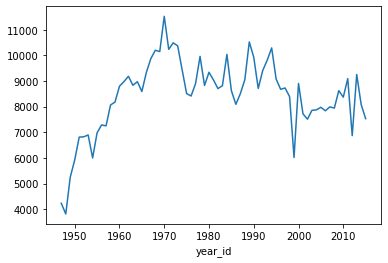

In [79]:
nba[nba["fran_id"] == "Knicks"].groupby("year_id")["pts"].sum().plot()

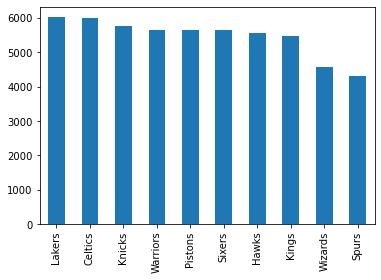

In [84]:
nba["fran_id"].value_counts().head(10).plot(kind="bar")